### Data gathering

In [1]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import re
import requests
from timeit import default_timer as timer

df = pd.read_csv('twitter-archive-enhanced.csv')

# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

##### Reviewing imported data both image recognition and Tweets

In [2240]:
df_1 = pd.read_json('tweet_json.txt',lines=True)
df_1.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [2241]:
df_im = pd.read_csv('image_predictions.tsv',sep='\t')
df_im.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Inspecting data types and completness

In [2242]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [2243]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Inspecting numerical data points

In [2244]:
df_1.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.330000e+03,2.330000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2330.000000,2330.000000,2196.0,2196.0,2.600000e+01,2.600000e+01
mean,7.419357e+17,7.419357e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2567.603004,7270.854936,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823308e+16,6.823308e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4342.954326,11294.399108,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782926e+17,6.782926e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,519.500000,1256.500000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.183508e+17,7.183508e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1197.500000,3148.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986712e+17,7.986712e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2974.000000,8882.750000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,73603.000000,149529.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [2245]:
df_im.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [2246]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url,allow_redirects=True)
open('image_predictions.tsv','wb').write(r.content)

335079

##### Duplicate check

In [2247]:
df_im.tweet_id.duplicated().sum()

0

In [2248]:
df_1.id.duplicated().sum()

0

## Quality observations

1. + Change value types for id, tweet_id to object
2. + Change date format to just dd/mm/yyyy (this is not necessary but I am just not interested in exact date stamp)
3. + Change dog breed to lowercase - image file
4. + Drop non-dogs from the list such as desktop computer, turtle and etc. - image file
5. + Changes lang header in Tweets to language and id to tweet_id in tweets data frame
6. + Change abbreviations to full name (I found it hard to understand what few mean). 
7. + Additional finding - extracted dog ratings must be changed to integer 
8. + Add column with dog score (numerator divided by denominator). This is more standardized/comparable rating
9. + Extract breed in one column
10. + Remove underscore from dog breed
## Additional quality observations after extracting dog ratings 
9. + Rows 45, 328,745 have float numerators - needs to changed
10. + Row 300 has two ratings and current pulled one is wrong (spotted due to 00 denominator)
11. + Need to drop / in ratings columns change data type to int for dog_rating_denom and dog_rating_num

## Tideness observations

1. + Extract dog rating from tweet text
2. + Extract device type how tweet was published
3. + Evaluate which columns are not needed for the research and remove them

### Data wrangling - Tidness

Creating copy of both data frames before making any changes

In [2249]:
tweets = df_1.copy()
images = df_im.copy()

In [2250]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [2251]:
tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


1. ##### Finding device source

After inspecting dataset I found 3 different data sources - iphone, make a scene (twitter specific moments creation via web only), and web device. Even though make a scene is created via web I believe it's worth keeping in as separete source because it's not just a regular tweet shared via web.

In [2252]:
#function to find all devices that tweet was published
def find_device(column,device):
    tweets[column] = tweets.source.str.findall(device)

In [2253]:
#find iphone
find_device('iphone_user','iPhone')

#find make a scene
find_device('make_a_scene','Make a Scene')

#find web
find_device('web','web')

In [2254]:
#creating new aggregated column
tweets['source_dev'] = tweets['iphone_user'] + tweets['make_a_scene'] + tweets['web']

In [2255]:
#changing lists to strings
tweets['publish_type'] = [''.join(map(str, l)) for l in tweets['source_dev']]

In [2256]:
tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,iphone_user,make_a_scene,web,source_dev,publish_type
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,[iPhone],[],[],[iPhone],iPhone


2. ##### Extracting dog ratings

for quality and future analysis purposes I use regex to get numerator and demonimator as separete columns and adding 3rd one where I pull them together. Third one serves me as additional quality check in case more than 1 rating is present in review or anything is off.

In [2257]:
#function to get dog rating using regex
def extract_ratings(new_column,regex):
    tweets[new_column] = tweets.full_text.str.extract(regex,expand=True)

In [2258]:
#numerator
extract_ratings('dog_rating_num','(\d{1,4}\/)')

#denominator
extract_ratings('dog_rating_denom','(\/\d{1,4})')

#together for quality check
extract_ratings('dog_rating','(\(?\d{1,4}\)?\/?\d{1,4})')

In [2259]:
tweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,quoted_status_permalink,quoted_status,iphone_user,make_a_scene,web,source_dev,publish_type,dog_rating_num,dog_rating_denom,dog_rating
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,[iPhone],[],[],[iPhone],iPhone,13/,/10,13/10


##### Exporting dataframe as csv to expect if there are major flaws with rating extraction.

In [2260]:
tweets.to_csv('testing1.csv',index=False)

3. ##### Drop unwanted data

In [2261]:
tweets = tweets.drop(['truncated','display_text_range','entities','in_reply_to_status_id',
           'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',
           'in_reply_to_screen_name','geo','coordinates','place','contributors',
           'favorited','retweeted','possibly_sensitive','retweeted_status',
           'quoted_status_id','quoted_status_id_str','quoted_status_permalink','quoted_status',
            'possibly_sensitive_appealable','id_str','extended_entities','user',
            'iphone_user','web','make_a_scene','source','source_dev','dog_rating','full_text',
            'is_quote_status'],axis=1)

In [2262]:
tweets.head(1)

,created_at,id,retweet_count,favorite_count,lang,publish_type,dog_rating_num,dog_rating_denom
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13/,/10


# Quality cleaning 

5. ##### Changing headers for lang and id in tweet data frame

In [2263]:
tweets = tweets.rename(columns={'id':'tweet_id','lang':'language'})

In [2264]:
tweets.head(1)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13/,/10


##### Change data types for id,tweet_id to object

In [2265]:
tweets.tweet_id = tweets.tweet_id.astype(object)
images.tweet_id = images.tweet_id.astype(object)

In [2266]:
tweets.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2325    666049248165822465
2326    666044226329800704
2327    666033412701032449
2328    666029285002620928
2329    666020888022790149
Name: tweet_id, Length: 2330, dtype: object

In [2267]:
images.tweet_id

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

##### Merge two files

In [2268]:
main = pd.merge(tweets,images,on = ['tweet_id'],how='left')

In [2269]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        2330 non-null   datetime64[ns, UTC]
 1   tweet_id          2330 non-null   object             
 2   retweet_count     2330 non-null   int64              
 3   favorite_count    2330 non-null   int64              
 4   language          2330 non-null   object             
 5   publish_type      2330 non-null   object             
 6   dog_rating_num    2330 non-null   object             
 7   dog_rating_denom  2330 non-null   object             
 8   jpg_url           2058 non-null   object             
 9   img_num           2058 non-null   float64            
 10  p1                2058 non-null   object             
 11  p1_conf           2058 non-null   float64            
 12  p1_dog            2058 non-null   object             
 13  p2 

11. ##### Dropping / from dog_rating_denom and dog_rating_num

In [2270]:
# function to get rid of /
def clean_rating(column):
    main[column] = main[column].str.replace(r'\D','',regex=True)

In [2271]:
#clean numerator
clean_rating('dog_rating_num')

#clean denominator
clean_rating('dog_rating_denom')

In [2272]:
main.head(1)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


9. ##### Rounding float values given in the numerator to closest integer and correcting ratings after inspection

In [2273]:
#function for all 3 changes
def value_change(row,column,new_value):
    main.at[row,column] = new_value

In [2274]:
#change values in cells
value_change(44,'dog_rating_num',14)
value_change(327,'dog_rating_num',10)
value_change(744,'dog_rating_num',11)

In [2275]:
main.iloc[44]

created_at                                2017-07-08 00:28:19+00:00
tweet_id                                         883482846933004288
retweet_count                                                  8576
favorite_count                                                41430
language                                                         en
publish_type                                                 iPhone
dog_rating_num                                                   14
dog_rating_denom                                                 10
jpg_url             https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                                                         1.0
p1                                                 golden_retriever
p1_conf                                                    0.943082
p1_dog                                                         True
p2                                               Labrador_retriever
p2_conf                                         

10. ##### Change row 300 which had completely wrong rating 13/10

In [2276]:
value_change(299,'dog_rating_num',13)
value_change(299,'dog_rating_denom',10)

In [2277]:
main.iloc[299]

created_at          2017-02-24 21:54:03+00:00
tweet_id                   835246439529840640
retweet_count                              68
favorite_count                           2033
language                                   en
publish_type                           iPhone
dog_rating_num                             13
dog_rating_denom                           10
jpg_url                                   NaN
img_num                                   NaN
p1                                        NaN
p1_conf                                   NaN
p1_dog                                    NaN
p2                                        NaN
p2_conf                                   NaN
p2_dog                                    NaN
p3                                        NaN
p3_conf                                   NaN
p3_dog                                    NaN
Name: 299, dtype: object

##### Change dog_rating_num and dog_rating_denom to integer

In [2278]:
main.dog_rating_num = main.dog_rating_num.astype(int)
main.dog_rating_denom = main.dog_rating_denom.astype(int)

In [2279]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        2330 non-null   datetime64[ns, UTC]
 1   tweet_id          2330 non-null   object             
 2   retweet_count     2330 non-null   int64              
 3   favorite_count    2330 non-null   int64              
 4   language          2330 non-null   object             
 5   publish_type      2330 non-null   object             
 6   dog_rating_num    2330 non-null   int64              
 7   dog_rating_denom  2330 non-null   int64              
 8   jpg_url           2058 non-null   object             
 9   img_num           2058 non-null   float64            
 10  p1                2058 non-null   object             
 11  p1_conf           2058 non-null   float64            
 12  p1_dog            2058 non-null   object             
 13  p2 

##### Adding column with calculated dog score

In [2280]:
main['dog_score'] = main['dog_rating_num']/main['dog_rating_denom']

In [2281]:
main.head()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_score
0,2017-08-01 16:23:56+00:00,892420643555336193,7293,34820,en,iPhone,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,2017-08-01 00:17:27+00:00,892177421306343426,5452,30157,en,iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,2017-07-31 00:18:03+00:00,891815181378084864,3592,22696,en,iPhone,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,2017-07-30 15:58:51+00:00,891689557279858688,7486,38078,en,iPhone,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,2017-07-29 16:00:24+00:00,891327558926688256,8046,36369,en,iPhone,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


2. ##### Change date format to yyy-mm-dd in tweets

In [2282]:
main["created_at"] = pd.to_datetime(main["created_at"]).dt.strftime('%Y-%m-%d')

In [2283]:
main.created_at = main.created_at.astype('datetime64')

In [2284]:
main.head(3)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_score
0,2017-08-01,892420643555336193,7293,34820,en,iPhone,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,2017-08-01,892177421306343426,5452,30157,en,iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,2017-07-31,891815181378084864,3592,22696,en,iPhone,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2


5. ##### Change languages from abbreviation to full name

In [2285]:
main.groupby('language').retweet_count.count()

language
en     2312
es        1
et        1
eu        1
in        3
nl        3
ro        1
tl        1
und       7
Name: retweet_count, dtype: int64

en = English
es = Spanish
et = Estonian
eu = Basque
in = Arabic
nl = Ducth
ro = Romanian
tl = Tagalog
und = Undetermined

In [2286]:
languages = ['language']
old = ['en','es','et','eu','in','nl','ro','tl','und']
new = ['English','Spanish','Estonian','Basque','Arabic','Ducth','Romanian','Tagalog','Undetermined']
for x in languages: 
    main[x]=main[x].replace(old,new)

In [2287]:
main.iloc[1].language

'English'

##### Dropping not dogs from data frame

I will drop rows with data that all 3 image recognitions are False. This comes with risk that some of pictures truly contain dogs. Nevertheless, I random sampled 10 pictures and 8 happened to be not dogs.
This expose great limition of the research.

In [2288]:
testing = main.query('p1_dog == False & p2_dog == False & p3_dog == False').jpg_url.sample(10)
testing

905       https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg
1874      https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg
2198      https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg
1915      https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg
1963      https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg
2007      https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg
2106      https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg
1187      https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg
910     https://pbs.twimg.com/ext_tw_video_thumb/75342...
889       https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg
Name: jpg_url, dtype: object

##### Dataframe changed to only include dogs.

In [2289]:
main = main.query('p1_dog == True or p2_dog == True or p3_dog == True')
main.head()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,dog_rating_num,dog_rating_denom,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_score
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,2017-07-30,891689557279858688,7486,38078,English,iPhone,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,2017-07-29,891327558926688256,8046,36369,English,iPhone,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
5,2017-07-29,891087950875897856,2698,18340,English,iPhone,13,10,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,1.3


##### Extract breed in one column

In [2290]:
# filtering for dog breeds in each column and adding now column with dog breed
def get_breed(head1,head2,head3,data1,data2,data3):
    main[head1] = main.query(data1).p1
    main[head2] = main.query(data2).p2
    main[head3] = main.query(data3).p3
    main['breed'] = main[head1].fillna('')+ main[head2].fillna('') + main[head3].fillna('')
    
get_breed('p1_breed','p2_breed','p3_breed',
         'p1_dog == True','p1_dog == False & p2_dog == True',
         'p1_dog == False & p2_dog == False & p3_dog == True')

##### Dropping remaining no longer needed columns. Please keep in mind this is done purely in mind that my research is not interesting in other data not that it's not valid.

In [2291]:
main.drop(['p1_breed','p2_breed','p3_breed','p1','p2','p3',
           'p1_dog','p2_dog','p3_dog','p1_conf','p2_conf','p3_conf',
           'img_num','dog_rating_denom','dog_rating_num'],axis=1,inplace=True)

In [2292]:
main.breed.isnull().sum()

0

In [2293]:
main.head()

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,jpg_url,dog_score,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,Chihuahua
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.2,Chihuahua
3,2017-07-30,891689557279858688,7486,38078,English,iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.3,Labrador_retriever
4,2017-07-29,891327558926688256,8046,36369,English,iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,1.2,basset
5,2017-07-29,891087950875897856,2698,18340,English,iPhone,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.3,Chesapeake_Bay_retriever


##### Removing underscore from breed for better visuals

In [2294]:
main.breed = main.breed.str.replace('_', ' ')

In [2299]:
main.head(2)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,jpg_url,dog_score,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,chihuahua
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.2,chihuahua


##### Making all breeds lowercase for comparability

In [2296]:
main.breed = main.breed.str.lower()

In [2298]:
main.head(3)

,created_at,tweet_id,retweet_count,favorite_count,language,publish_type,jpg_url,dog_score,breed
1,2017-08-01,892177421306343426,5452,30157,English,iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,chihuahua
2,2017-07-31,891815181378084864,3592,22696,English,iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.2,chihuahua
3,2017-07-30,891689557279858688,7486,38078,English,iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.3,labrador retriever


## Visuals & Insights

In [2308]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2333]:
#creating function for all bar charts in case study
def bar_chart(var,color,title,x_label,y_label,rotation):
    var
    plt.subplots(figsize=(16, 5))
    plt.bar(var.index,var,color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=rotation)
    plt.grid(axis='x',color='grey',linestyle = ':',alpha=0.7);

##### Filtering down most popular dogs. Dropping top 1% for outliers and bottom 90% to only include most popular dogs

In [2366]:
drop_low_outliers = main[main.favorite_count > main.favorite_count.quantile(.9)]
drop_high_outliers = drop_low_outliers[drop_low_outliers.favorite_count < drop_low_outliers.favorite_count.quantile(.99)]
most_liked_breed = drop_high_outliers.groupby('breed').mean()
most_liked_breed

,retweet_count,favorite_count,dog_score
breed,,,
afghan hound,8917.000000,24091.000000,1.300000
american staffordshire terrier,2923.500000,21057.500000,0.550000
basset,4762.250000,26157.500000,1.250000
bedlington terrier,17267.500000,48909.500000,1.250000
bernese mountain dog,4057.000000,25413.000000,1.300000
black-and-tan coonhound,6865.000000,30083.000000,1.400000
blenheim spaniel,6684.500000,28687.500000,1.200000
bloodhound,6222.000000,26665.000000,1.400000
border collie,5985.000000,28218.500000,1.250000


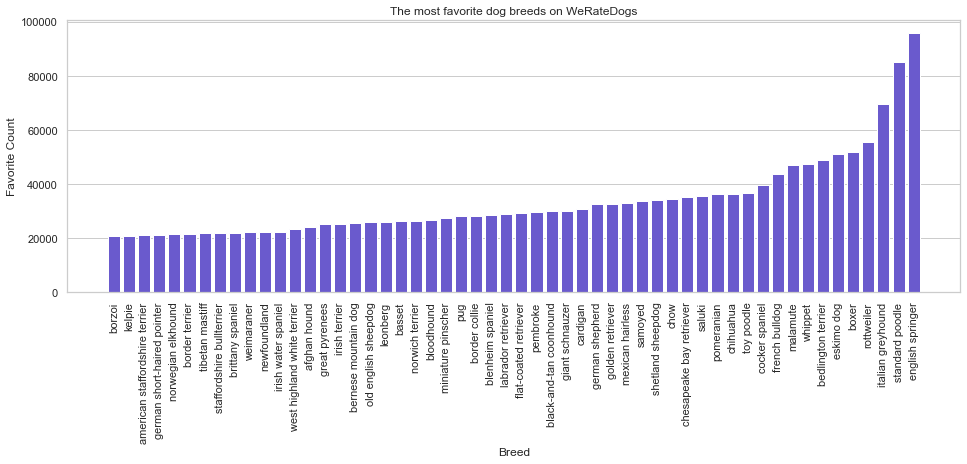

In [2363]:
bar_chart(most_liked_breed['favorite_count'].sort_values(),
          'slateblue','The most favorite dog breeds on WeRateDogs','Breed','Favorite Count',90)

English Springer has been on average most favorited dog breed on WeRateDogs. It received on avarage nearly 10k favorite hits on Twitter. Followed by Standard Poodle with over 8.5k hits and Italian Greyhound with nearly 7k hits.

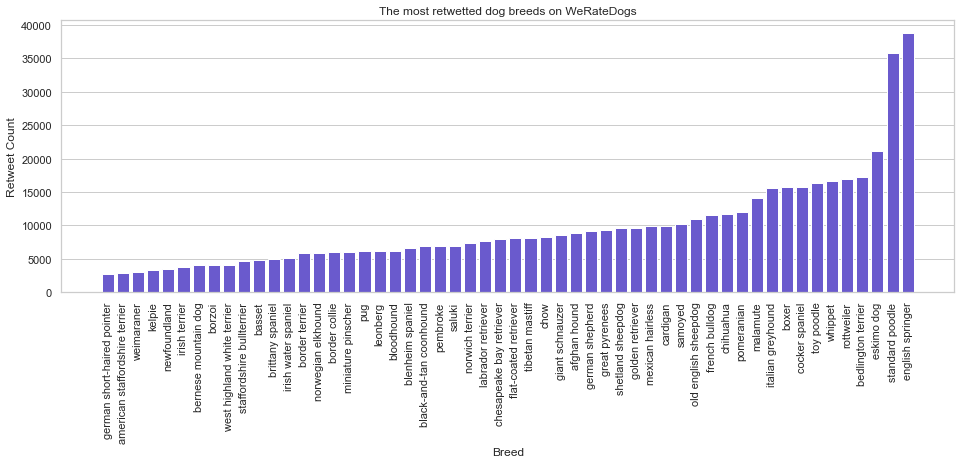

In [2368]:
bar_chart(most_liked_breed['retweet_count'].sort_values(),
          'slateblue','The most retwetted dog breeds on WeRateDogs','Breed','Retweet Count',90)

English Springer is not only most favorite by also most retweetted breed with nearly 4k retweets. It is followed by Standard Poodle which on avarage was retweetted nearly 3.6k times. 

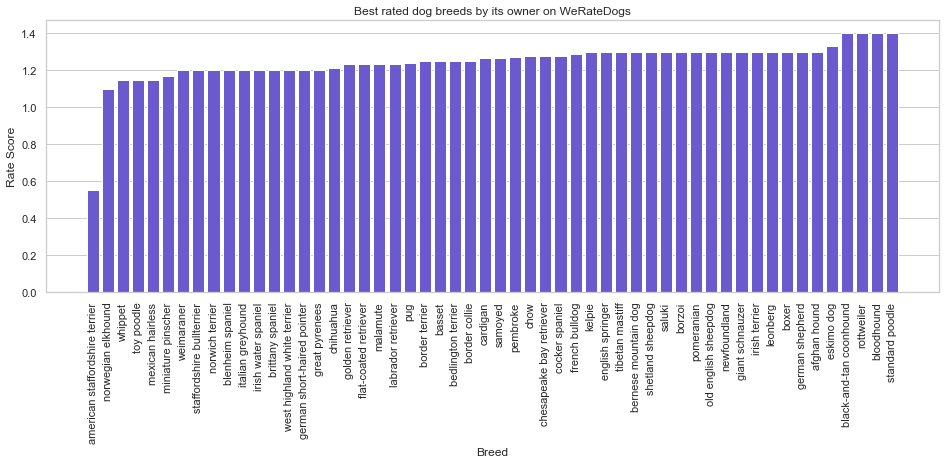

In [2369]:
bar_chart(most_liked_breed['dog_score'].sort_values(),
          'slateblue','Best rated dog breeds by its owner on WeRateDogs','Breed','Rate Score',90)

For breeds share first place in their owners rating. Standard Poodle, Bloodhount, Rottweiler and Black and Tan Coonhound. These take first place is dogs rating by owners. It is calculated by WeRateDogs standard where owners can rate with higher numerator than denominator. First for scored 1.4 which is = 140%